In [4]:
# Mengimpor library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [12]:
# Mengimpor datasetnya
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
df.shape

(5110, 12)

In [6]:
# Drop kolom yang tidak diperlukan
df = df.drop(['id'], axis=1)

In [7]:
# Mengisi nilai kosong dengan rata-rata kolom
df = df.fillna(df.mean())

<ipython-input-7-8b5a47d45807>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [8]:
# Konversi data kategorikal menjadi numerik
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [10]:
# Menerapkan PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [25]:
# Persentase variasi yang dijelaskan oleh setiap komponen utama
explained_variance_ratio = pca.explained_variance_ratio_

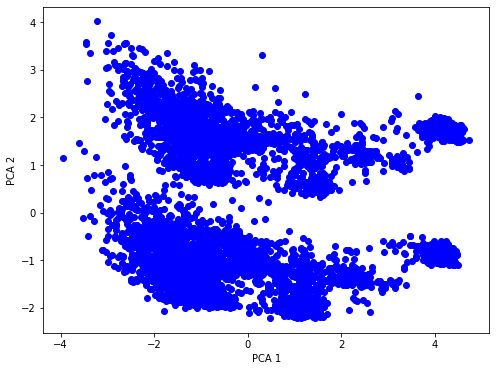

In [11]:
# Visualisasi hasil PCA
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

kode di atas digunakan untuk membuat scatter plot dari hasil PCA yang ditampilkan dalam 2 dimensi dengan sumbu x dan sumbu y masing-masing merepresentasikan principal component 1 dan principal component 2. Hal ini berguna untuk melihat pola-pola yang terbentuk pada data setelah dilakukan reduksi dimensi menggunakan PCA.

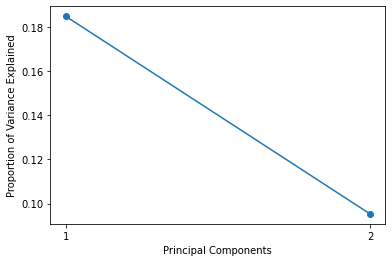

In [16]:
# Membuat scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.show()

Jadi, kode di atas digunakan untuk membuat scree plot yang membantu dalam menentukan jumlah principal component yang paling relevan untuk diambil dalam PCA. Plot menunjukkan proporsi variansi dalam data yang dijelaskan oleh masing-masing principal component, dan penentuan jumlah principal component dapat dilakukan dengan mengamati titik-titik di plot di mana proporsi variansi yang dijelaskan mulai menurun secara signifikan.

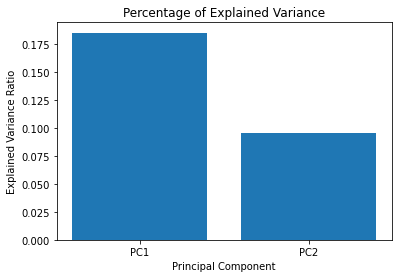

In [30]:
# Scree plot
plt.bar(['PC1', 'PC2'], pca.explained_variance_ratio_)
plt.title('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

Pada bar plot ini, sumbu x menunjukkan nama dari masing-masing komponen utama yang dihasilkan oleh PCA (dalam contoh ini hanya PC1 dan PC2), sedangkan sumbu y menunjukkan persentase variasi yang dijelaskan oleh setiap komponen utama. Semakin tinggi nilai pada sumbu y, semakin banyak variasi yang dijelaskan oleh komponen utama tersebut.

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Muat data dari file CSV
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Pisahkan fitur dan target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Bagi data menjadi data training dan data testing dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Lakukan one-hot encoding pada fitur kategori
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


In [40]:
# Periksa nama kolom pada data training
print(X_train.columns)

# Periksa nama kolom pada data testing
print(X_test.columns)


Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_Female', 'gender_Male', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')
Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
 

In [51]:
# Membuat confusion matrix
import numpy as np

# Example predicted and actual values
predicted = np.array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1])
actual = np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0])

# Create an empty 2x2 confusion matrix
confusion_matrix = np.zeros((2, 2))

# Loop through the predicted and actual values, and increment the corresponding cell in the matrix
for p, a in zip(predicted, actual):
    confusion_matrix[p][a] += 1

# Print the confusion matrix
print(confusion_matrix)


[[2. 2.]
 [3. 3.]]


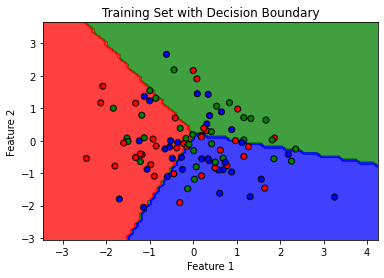

In [54]:
# Visualisasi Training Set
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Generate some example data
X = np.random.randn(100, 2)
y = np.random.randint(0, 3, size=100)

# Train a logistic regression classifier on the data
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)

# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define the colormap
colors = ListedColormap(['red', 'green', 'blue'])

# Create the contour plot with the decision boundary
plt.contourf(xx, yy, Z, cmap=colors, alpha=0.75)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors, edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Set with Decision Boundary')
plt.show()

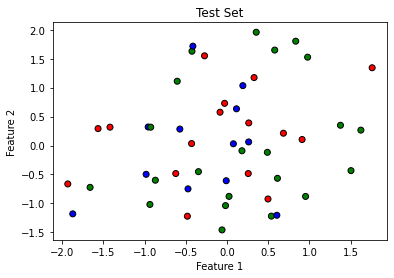

In [14]:
# Visualisasi Test Set
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Generate some example data for test set
X_test = np.random.randn(50, 2)
y_test = np.random.randint(0, 3, size=50)

# Plot the test set
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(['red', 'green', 'blue']), edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Set')
plt.show()
